<a href="https://colab.research.google.com/github/cellWall/ICT304_Assignment1/blob/main/ICT304_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv5 Gun and Knife Detection Prototype

We will be using YOLOv5 as it is beginner friendly, it has fast training compared to the newer versions, it has numerous tutorials online and it can easily be custom trained.

In [7]:
# mounting model to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## YOLOv5 Setup

This part involves downloading the libraries and importing the YOLOv5 model.

In [1]:
# installing ultralytics library to train YOLO model
!pip install --quiet ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.8 MB/s eta 0:00:00


In [2]:
# cloning and installing yolov5 repo from github

!git clone https://github.com/ultralytics/yolov5 # clone
%cd yolov5
!pip install -r requirements.txt -q # install

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17491 (from 3)
Receiving objects: 100% (17511/17511), 16.65 MiB | 29.76 MiB/s, done.
Resolving deltas: 100% (11996/11996), done.
/content/yolov5


## Importing data

For the prototype, we will be using a dataset from Kaggle that has 3000 images of guns, and is labelled using YOLO format. In the final demonstration, we will include knives as well. For the sake of this prototype, we will stick to guns.


The dataset was obtained from kaggle: https://www.kaggle.com/datasets/atulyakumar98/gundetection/data


The following pre-processing steps were done for the data that was obtained from kaggle:
1. data was downloaded onto local computer drive. labels and images were in one folder.
2. labels and images were split into two different folders.
3. two more folders were created; train and test, and within each there were labels and images. they were split locally on the laptop for convenience and cleanliness of code in this colab.
4. all data was kept in a folder called 'data' that was zipped and then uploaded onto this colab.
5. 5 test images were obtained from google, 3 of which have guns and 2 of which do not. it was also uploaded as a zip folder called 'test_images.zip' for a final round of testing at the end.


To run the code, please **upload two zip folders**, **'data.zip'** and **'test_images.zip'** to this colab from your laptop. For the purpose of this assignment, the two folders are zipped together with this notebook and submitted.

In [3]:
%cd /content
# ensure we are in the right directory so that data folder can easily be unzipped below

/content


In [4]:
# unzip data
!unzip -q final_data.zip -d data/

In [5]:
# creat YAML file - stores configuration settings for YOLO in a human-readable format
data_yaml = """
train: /content/data/final_data/train/images
test: /content/data/final_data/test/images
val: /content/data/final_data/valid/images

nc: 2
names: ['knife', 'gun']
"""

with open("data.yaml", "w") as f:
    f.write(data_yaml)

## Training YOLO Model

after importing the images and their labels in the YOLO format, and creating a YAML file, our model is ready to be trained. we are using 16 batch and 30 epochs for this trial run.

In [9]:
import shutil
import os

# Source folder containing all training runs
src_folder = '/content/yolov5/runs/train/'

# Destination folder in your Google Drive
dst_folder = '/content/drive/MyDrive/yolo_backups/train_runs_backup'

# Create destination if it doesn't exist
os.makedirs(dst_folder, exist_ok=True)

# Copy entire training folder to Drive
shutil.copytree(src_folder, dst_folder, dirs_exist_ok=True)

'/content/drive/MyDrive/yolo_backups/train_runs_backup'

In [10]:
# running YOLO model
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 30 --data ../data.yaml --weights yolov5s.pt

# Automatically back up
shutil.copytree('/content/yolov5/runs/train', '/content/drive/MyDrive/yolo_results_backup/second_run', dirs_exist_ok=True)

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      24/29      4.48G    0.02834    0.01374   0.001844         40        640:  18% 77/426 [00:28<01:59,  2.92it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      24/29      4.48G    0.02837    0.01376   0.001829         42        640:  18% 78/426 [00:28<02:13,  2.61it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      24/29      4.48G    0.02834    0.01378   0.001845         47        640:  19% 79/426 [00:28<01:59,  2.89it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

'/content/drive/MyDrive/yolo_results_backup'

## Testing Model

Now, we will test the model using 5 images that we have uploaded from Google. We will upload and unzip the images and then run the weights that the YOLO model learned from our data on our images.

In [11]:
%cd /content # ensuring we are in the right directory (exiting YOLO directory)

[Errno 2] No such file or directory: '/content # ensuring we are in the right directory (exiting YOLO directory)'
/content/yolov5


In [12]:
# unzip test data

!unzip -q test_images.zip -d content/

unzip:  cannot find or open test_images.zip, test_images.zip.zip or test_images.zip.ZIP.


In [13]:
%cd yolov5/ # entering YOLO directory to run detect.py

[Errno 2] No such file or directory: 'yolov5/ # entering YOLO directory to run detect.py'
/content/yolov5


In [14]:
# test the performance of the model using images downloaded from google
!python detect.py \
  --weights runs/train/exp/weights/best.pt \
  --source /content/content/test_images \
  --img 640 \
  --conf 0.25 \
  --save-txt \
  --save-conf

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/content/test_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 438, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 433, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*a

## Results

The output from running the model on the 5 images were screenshotted and uploaded as seen here.

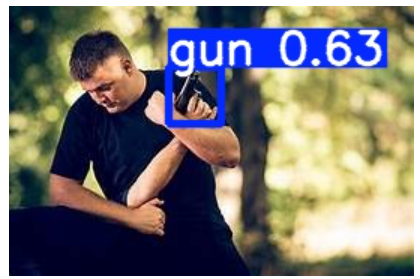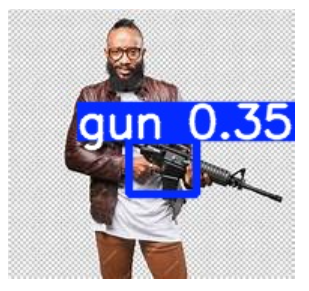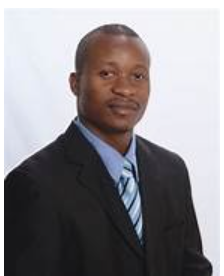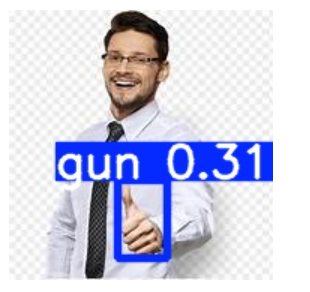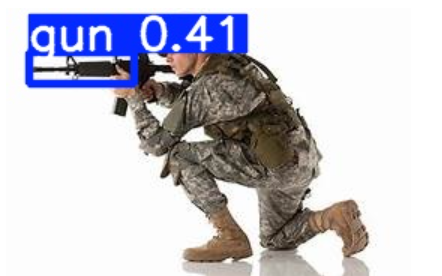

## Conclusion

As this a prototype for now, we only used 16 batches and 30 epochs, and used YOLOv5s instead of more advanced versions such as YOLOv8, or larger versions such as YOLOv5m. We also only focused on detecting guns first, however, in the final version, our model will be trained on knife images and learn to detect knives as well.

In the results folder, results.csv, we gathered that our model was trained with an acceptable performance, as the mAP@0.5 was 92.8%, and the mAP@0.5:0.95 was 68.5%. The precision was 89.6% and the recall was 86.9%.

However, based on the images output as above, it is evident that the model still requires more fine-tuning, and is not very accurate. In order to increase accuracy, we will expose our model to larger dataset, run more batches and epochs, and do more evaluation.

## References

Open source colab notebook with YOLO code: https://colab.research.google.com/github/EdjeElectronics/Train-and-Deploy-YOLO-Models/blob/main/Train_YOLO_Models.ipynb#scrollTo=8X62eFTugosf

